# Clustering Using K-Means Algorithm

#### import libraries

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#### Load the dataset

In [4]:
df = pd.read_csv('D:\ML training\python\income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


#### plot the scatter plot

Text(0, 0.5, 'Income($)')

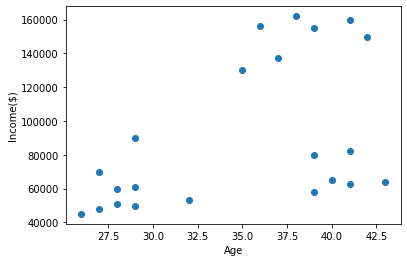

In [7]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

- here we only take 2 features for plotting becoz name column does not make sense 

#### Use K-Means Algorithm to assign these datapoints to the different clusters

In [8]:
km = KMeans(n_clusters = 3)
km 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### predict which datapoint is assigned to which cluster

In [9]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

- so these are cluster numbers

#### Make new column in the data and store all the cluster values in it

In [10]:
df['cluster'] = y_predicted
df.head()

# here for each and every record we have assigned a cluster

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


#### check what are the centroids of these cluster

In [11]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

- so here we get three values in the pair that are the centers , center of cluster 1, center of cluster 2, center of cluster 3 

#### print all these centers on the scattered plot with different colors

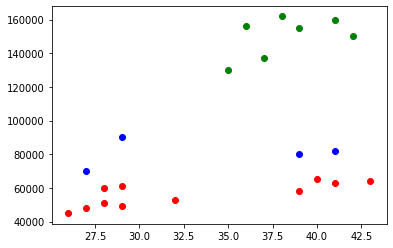

In [12]:
# here we assign 3 different dataframes
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age , df1['Income($)'] , color='green')
plt.scatter(df2.Age , df2['Income($)'] , color='red')
plt.scatter(df3.Age , df3['Income($)'] , color='blue')

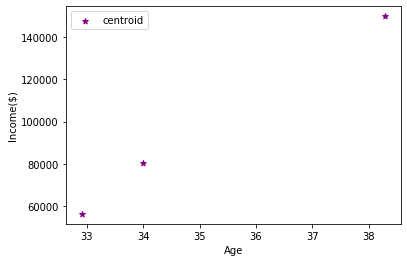

In [15]:
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple' , marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

**here we see that our data is not in same range so we have to preprocessing the data**

#### Preprocessing using min max scaler

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0
5,Gautam,39,0.940171,0
6,David,41,0.982906,0
7,Andrea,38,1.000000,0
8,Brad,36,0.948718,0
9,Angelina,35,0.726496,0


- now we see that income values are within the range of 0 and 1

In [19]:
# similar scaling we have to do with the age column
scaler.fit(df[['Age']])
df['Age']= scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


- now both the age and income column are in the range of 0 and 1

#### Again we predict the values

In [20]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

# this time we have different prediction as compared to previous

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

#### Again we plot

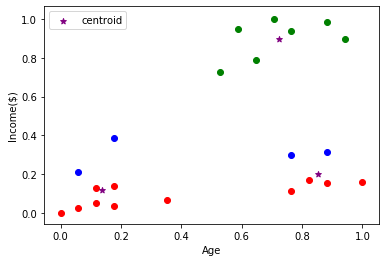

In [23]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age , df1['Income($)'] , color='green')
plt.scatter(df2.Age , df2['Income($)'] , color='red')
plt.scatter(df3.Age , df3['Income($)'] , color='blue')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple' , marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()